# ANOVA (분산분석) : 세 맛집 프로그램의 영향력 차이가 있는지 검정

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2018.csv')

In [3]:
df.head()

,방송,식당,방영일,포스팅일,제목,days_diff,위치,서울,방영전,방영후
0,생생정보통,전주회관식당,2018-01-02,2018-01-02,전주 비빔밥 맛집 식당 ㅣ 가족회관,0,진안,0.0,0,1
1,생생정보통,전주회관식당,2018-01-02,2018-01-27,"[롯데몰 은평 맛집]전주중앙회관,비빔밥,윤식당 비빔밥,제육볶음 비빔밥,정식추천,세트...",25,진안,0.0,0,1
2,생생정보통,전주회관식당,2018-01-02,2018-01-02,생생정보 484회 더덕 흑돼지구이 진안군 전주회관식당 맛집 인력거 체험 달콤한 홍삼...,0,진안,0.0,0,1
3,생생정보통,전주회관식당,2018-01-02,2017-12-31,2017송년. 좋은사람들과 좋은만남. 아름다운 마무리. 전주역 앞. 맛집식당. 두...,-2,진안,0.0,1,0
4,생생정보통,전주회관식당,2018-01-02,2018-01-24,[전주한옥마을]종로회관,22,진안,0.0,0,1


### ANOVA 분석을 위한 데이터 전처리 ( X : 방송명, Y : 방영 후 포스팅 증가수)

In [4]:
anova = pd.DataFrame(df.groupby(['식당', '방송'])['방영전', '방영후'].sum()).reset_index()

In [5]:
anova.head()

,식당,방송,방영전,방영후
0,3일한우국밥,생생정보통,29,66
1,가람떡갈비,맛있는 녀석들,13,56
2,가마솥 족발,생생정보통,160,151
3,가마솥손두부,생생정보통,30,49
4,강남 국미당,수요미식회,1,7


In [5]:
anova['증가'] = anova['방영후'] - anova['방영전']

In [7]:
anova.head()

,식당,방송,방영전,방영후,증가
0,3일한우국밥,생생정보통,29,66,37
1,가람떡갈비,맛있는 녀석들,13,56,43
2,가마솥 족발,생생정보통,160,151,-9
3,가마솥손두부,생생정보통,30,49,19
4,강남 국미당,수요미식회,1,7,6


In [17]:
anova['증가'].groupby(anova['방송']).describe()

,count,mean,std,min,25%,50%,75%,max
방송,,,,,,,,
맛있는 녀석들,34.0,2.529412,76.221859,-318.0,-10.25,13.0,39.75,178.0
생생정보통,32.0,16.406250,29.963267,-92.0,6.75,11.5,20.25,101.0
수요미식회,33.0,28.787879,29.050342,-15.0,6.00,29.0,38.00,137.0


In [18]:
anova.to_csv('2018_tidy.csv', index=False)

## 가정 check!

### 1. 정규성 검정

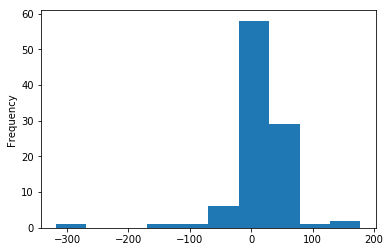

In [38]:
anova['증가'].plot(kind = 'hist')

In [11]:
#anova1 = anova.loc[(anova['증가']> -100) & (anova['증가']<100)]

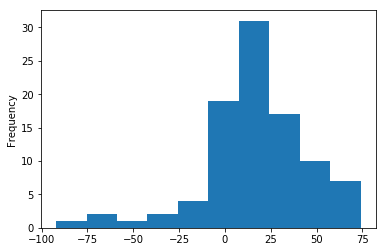

In [12]:
#anova1['증가'].plot(kind = 'hist')

outlier 제거해봄

In [19]:
stats.shapiro(anova['증가'][anova['방송'] == '맛있는 녀석들'])

(0.7688440084457397, 6.76021500112256e-06)

In [20]:
stats.shapiro(anova['증가'][anova['방송'] == '생생정보통'])

(0.7842313051223755, 2.0886251149931923e-05)

In [21]:
stats.shapiro(anova['증가'][anova['방송'] == '수요미식회'])

(0.8741214871406555, 0.001212559873238206)

모두 정규성에 위배됨.......

((array([-2.01197163, -1.6105163 , -1.36883603, -1.1880445 , -1.03948072,
         -0.91090285, -0.79586259, -0.69050407, -0.59231064, -0.49952733,
         -0.41086261, -0.32532036, -0.24209833, -0.16052274, -0.08000327,
          0.        ,  0.08000327,  0.16052274,  0.24209833,  0.32532036,
          0.41086261,  0.49952733,  0.59231064,  0.69050407,  0.79586259,
          0.91090285,  1.03948072,  1.1880445 ,  1.36883603,  1.6105163 ,
          2.01197163]),
  array([-62, -61, -52, -34, -30, -22, -12,  -5,  -1,   4,   9,   9,   9,
          12,  13,  13,  15,  17,  19,  20,  23,  28,  30,  43,  44,  45,
          49,  51,  60,  62,  68], dtype=int64)),
 (35.141816316591076, 11.74193548387096, 0.9795499163229399))

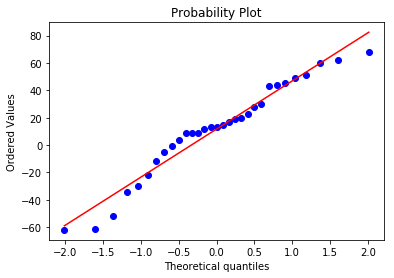

In [15]:
stats.probplot(anova['증가'][anova['방송'] == '맛있는 녀석들'], plot= plt)

((array([-2.01197163, -1.6105163 , -1.36883603, -1.1880445 , -1.03948072,
         -0.91090285, -0.79586259, -0.69050407, -0.59231064, -0.49952733,
         -0.41086261, -0.32532036, -0.24209833, -0.16052274, -0.08000327,
          0.        ,  0.08000327,  0.16052274,  0.24209833,  0.32532036,
          0.41086261,  0.49952733,  0.59231064,  0.69050407,  0.79586259,
          0.91090285,  1.03948072,  1.1880445 ,  1.36883603,  1.6105163 ,
          2.01197163]),
  array([-92,  -9,  -2,   0,   5,   5,   5,   6,   7,  11,  11,  11,  11,
          11,  11,  11,  12,  13,  14,  14,  14,  15,  17,  19,  24,  29,
          37,  40,  45,  55,  74], dtype=int64)),
 (22.97810229536809, 13.677419354838705, 0.8477179716653752))

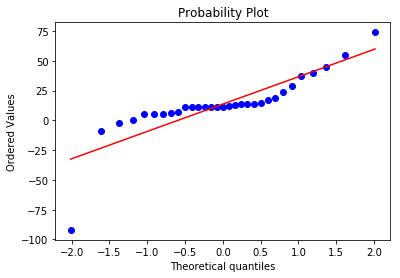

In [16]:
stats.probplot(anova['증가'][anova['방송'] == '생생정보통'], plot= plt)

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-15, -11,  -1,   1,   3,   4,   4,   6,   6,   6,   9,  20,  22,
          24,  25,  27,  29,  32,  32,  32,  34,  34,  34,  36,  38,  40,
          41,  46,  47,  64,  71,  73], dtype=int64)),
 (22.356989384162073, 25.406250000000004, 0.9820241535802277))

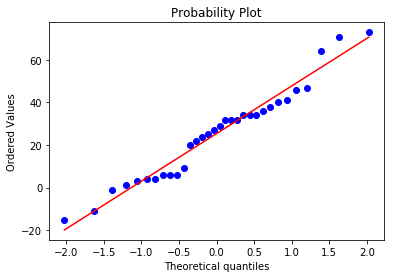

In [17]:
stats.probplot(anova['증가'][anova['방송'] == '수요미식회'], plot= plt)

흠....
일단 데이터의 수가 크니 정규분포를 따른다고 가정하고 넘어가자

### 2. 등분산 검정

In [48]:
stats.levene(anova['증가'][anova['방송'] == '맛있는 녀석들'], 
             anova['증가'][anova['방송'] == '생생정보통'],
             anova['증가'][anova['방송'] == '수요미식회'])

LeveneResult(statistic=3.185956996959367, pvalue=0.04579130757264899)

아....이것도 위배된다.....

In [18]:
stats.levene(anova1['증가'][anova1['방송'] == '맛있는 녀석들'], 
             anova1['증가'][anova1['방송'] == '생생정보통'],
             anova1['증가'][anova1['방송'] == '수요미식회'])

LeveneResult(statistic=2.930504007701646, pvalue=0.05842578580866439)

등분산은 통과

## ANOVA

In [32]:
stats.f_oneway(anova['증가'][anova['방송'] == '맛있는 녀석들'], 
             anova['증가'][anova['방송'] == '생생정보통'],
             anova['증가'][anova['방송'] == '수요미식회'])

F_onewayResult(statistic=2.251648138500149, pvalue=0.11075529675853876)

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [34]:
broad_lm = ols('증가 ~ C(방송)',
                 data=anova).fit()
table = sm.stats.anova_lm(broad_lm, typ=2)

In [35]:
print(table)

                 sum_sq    df         F    PR(>F)
C(방송)      11565.952076   2.0  2.251648  0.110755
Residual  246559.704490  96.0       NaN       NaN


In [36]:
broad_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     증가   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.252
Date:                Mon, 20 Aug 2018   Prob (F-statistic):              0.111
Time:                        20:58:00   Log-Likelihood:                -527.58
No. Observations:                  99   AIC:                             1061.
Df Residuals:                      96   BIC:                             1069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.5294      8.691      0.291      0.772     -14.723      19.782
C(방송)[T.생생정보통]    13.8768     12.482      1.112      0.269     -10.900      38.653
C(방송)[T.수요미식회]    26.2585     12.384      2.120      0.037       1.676      50.841
==============================================================================
Omnibus:                       83.259   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1302.980
Skew:                          -2.367   Prob(JB):                    1.15e-283
Kurtosis:                      20.131   Cond. No.                         3.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
broad_lm1 = ols('증가 ~ C(방송)',
                 data=anova1).fit()
broad_lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     증가   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.212
Date:                Mon, 20 Aug 2018   Prob (F-statistic):              0.115
Time:                        22:44:02   Log-Likelihood:                -444.98
No. Observations:                  94   AIC:                             896.0
Df Residuals:                      91   BIC:                             903.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.7419      5.023      2.337      0.022       1.763      21.720
C(방송)[T.생생정보통]     1.9355      7.104      0.272      0.786     -12.176      16.047
C(방송)[T.수요미식회]    13.6643      7.049      1.939      0.056      -0.337      27.665
==============================================================================
Omnibus:                       15.741   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.989
Skew:                          -0.708   Prob(JB):                     3.75e-06
Kurtosis:                       5.092   Cond. No.                         3.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
table = sm.stats.anova_lm(broad_lm1, typ=2)
print(table)

                sum_sq    df         F    PR(>F)
C(방송)      3460.475828   2.0  2.211759  0.115362
Residual  71188.428427  91.0       NaN       NaN


In [37]:
anova.loc[anova['방송']=='맛있는 녀석들']

,식당,방송,방영전,방영후,증가
1,가람떡갈비,맛있는 녀석들,13,56,43
11,고향 양꼬치,맛있는 녀석들,145,7,-138
13,교동두부,맛있는 녀석들,105,149,44
15,김북순큰남비집,맛있는 녀석들,7,16,9
18,나정순할매쭈꾸미,맛있는 녀석들,41,103,62
21,도토리 편백집,맛있는 녀석들,84,50,-34
25,마복림떡볶이,맛있는 녀석들,175,114,-61
28,맛집 마음과마음,맛있는 녀석들,71,90,19
38,봉구네 고기집,맛있는 녀석들,5,14,9
39,봉산옥,맛있는 녀석들,4,53,49


In [6]:
anova.loc[anova['방송']=='수요미식회']

,식당,방송,방영전,방영후,증가
4,강남 국미당,수요미식회,1,7,6
5,강남 대우부대찌개,수요미식회,36,21,-15
6,강남 우정양곱창,수요미식회,6,33,27
7,강남 우텐더강남 삼정하누,수요미식회,2,22,20
9,고양 만포면옥,수요미식회,2,8,6
10,고양 양각도,수요미식회,13,2,-11
14,기와집순두부,수요미식회,49,87,38
23,동부식육식당,수요미식회,3,37,34
24,또이또이베트남,수요미식회,18,54,36
26,마포 옥동식,수요미식회,8,11,3
